In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
# prompt: Write a gdown command to download a csv file

!gdown --id 13nKW78BwVgDHAD8-FkHmaaf6uS9htGEw


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13nKW78BwVgDHAD8-FkHmaaf6uS9htGEw
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 182MB/s]


In [308]:
df = pd.read_csv('netflix_titles.csv')

#**DATA CLEANING**

In [309]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [311]:
df_id = df['show_id'].str.split("s", n=1, expand=True)
df_id.drop(columns=0, inplace=True)
df['show_id'] = df_id[1]
df['show_id'] = pd.to_numeric(df['show_id'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [312]:
df.replace(np.nan, 'Unknown', inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [313]:
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4529
cast : 7693
country : 749
date_added : 1768
release_year : 74
rating : 18
duration : 221
listed_in : 514
description : 8775


##Get Movie Dataframe

In [314]:
df_movies = df[df['type'] == 'Movie']
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


##Get TV Show dataframe

In [315]:
df_TV = df[df['type'] == 'TV Show']
df_TV.head()
df_movies = df[df['type'] == 'Movie']
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [316]:
## Split Directors
con1 = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_con1 = pd.DataFrame(con1, index=df['title'])
df_con1=df_con1.stack()
df_con1=pd.DataFrame(df_con1.reset_index())
df_con1.rename(columns={0:'director'}, inplace=True)
df_con1.drop(columns='level_1', inplace=True)
df_con1.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown


In [317]:
## Split Cast
con2 = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_con2 = pd.DataFrame(con2, index=df['title'])
df_con2=df_con2.stack()
df_con2=pd.DataFrame(df_con2.reset_index())
df_con2.rename(columns={0:'actors'}, inplace=True)
df_con2.drop(columns='level_1', inplace=True)
df_con2.head()

,title,actors
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [318]:
## Split Country
con3 = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_con3 = pd.DataFrame(con3, index=df['title'])
df_con3=df_con3.stack()
df_con3=pd.DataFrame(df_con3.reset_index())
df_con3.rename(columns={0:'country'}, inplace=True)
df_con3.drop(columns='level_1', inplace=True)
df_con3.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India


In [319]:
## Split listed_in
con4 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_con4 = pd.DataFrame(con4, index=df['title'])
df_con4=df_con4.stack()
df_con4=pd.DataFrame(df_con4.reset_index())
df_con4.rename(columns={0:'listed_in'}, inplace=True)
df_con4.drop(columns='level_1', inplace=True)
df_con4.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [320]:
df_new = df_con1.merge(df_con2, on=['title'], how='inner') \
  .merge(df_con3, on=['title'], how='inner') \
  .merge(df_con4, on=['title'], how='inner')
df_new.reindex(columns=['title', 'director', 'actors', 'country', 'listed_in'])
df_new.head()

,title,director,actors,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows


In [321]:
df_final = pd.merge(df_new, df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']], on='title', how='left')
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [322]:
df_final.isnull().sum()

,0
title,0
director,0
actors,0
country,0
listed_in,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [323]:
df_final['date_added'].replace(['Unknown'],[np.nan],inplace=True)
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [324]:
df_final[df_final['date_added'].isnull()].head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown,Daniel Radcliffe,United Kingdom,British TV Shows,6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Unknown,Daniel Radcliffe,United Kingdom,TV Comedies,6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Unknown,Daniel Radcliffe,United Kingdom,TV Dramas,6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Unknown,Jon Hamm,United Kingdom,British TV Shows,6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Unknown,Jon Hamm,United Kingdom,TV Comedies,6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [325]:
for i in df_final['date_added'].isnull():
  if i == True:
    df_final['date_added'].fillna(df_final['release_year'], inplace=True)

In [326]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'], format='mixed').dt.strftime('%Y-%m-%d')
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [327]:
df_final['month'] = pd.to_datetime(df_final['date_added']).dt.month_name()
df_final['day'] = pd.to_datetime(df_final['date_added']).dt.day_name()
df_final['year'] = pd.to_datetime(df_final['date_added']).dt.year
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min,September,Saturday,2021
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021


In [328]:
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [329]:
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final.loc[df_final['rating'] == 'Unknown', 'rating'] = 'NR'
df_final.sample(10)

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year
152221,Everybody Knows,Asghar Farhadi,Ramón Barea,France,Dramas,6714,Movie,2019-06-06,2019,R,133 min,June,Thursday,2019
50280,Little Singham: Kaal Ka Badla,Prakash Satam,Parminder Ghumman,Unknown,Comedies,2115,Movie,2020-08-19,2020,TV-Y7,70 min,August,Wednesday,2020
44307,A Babysitter's Guide to Monster Hunting,Rachel Talalay,Alessio Scalzotto,United States,Children & Family Movies,1845,Movie,2020-10-15,2020,TV-PG,99 min,October,Thursday,2020
179896,Rumor Has It,Rob Reiner,Steve Sandvoss,United States,Comedies,7902,Movie,2019-08-01,2005,PG-13,97 min,August,Thursday,2019
100361,F.R.E.D.I.,Sean Olson,Christina Cox,United States,Children & Family Movies,4296,Movie,2018-12-15,2018,TV-PG,90 min,December,Saturday,2018
20201,Mosquita y Mari,Aurora Guerrero,Joaquín Garrido,United States,LGBTQ Movies,801,Movie,2021-06-02,2012,TV-14,85 min,June,Wednesday,2021
99359,Hashoter Hatov,Unknown,Yuval Semo,Israel,International TV Shows,4255,TV Show,2018-12-28,2015,TV-MA,1 Season,December,Friday,2018
69525,Narcos: Mexico,Unknown,José María Yazpik,Mexico,TV Dramas,2922,TV Show,2020-02-13,2020,TV-MA,2 Seasons,February,Thursday,2020
92155,Money Trap,Yılmaz Erdoğan,Rıza Kocaoğlu,Turkey,Dramas,3890,Movie,2019-04-26,2019,TV-MA,122 min,April,Friday,2019
169717,Merry Men: The Real Yoruba Demons,Toka McBaror,Falz,Nigeria,Comedies,7449,Movie,2019-09-21,2018,TV-MA,106 min,September,Saturday,2019


In [330]:
df_final['duration_copy'] = df_final['duration']
df_final['duration_copy'] = df_final['duration'].str.replace('min', '')
df_final['duration_copy'] = df_final['duration_copy'].str.replace('Season', '')
df_final['duration_copy'] = df_final['duration_copy'].str.replace('s', '')
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min,September,Saturday,2021,90
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,2
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,2
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,2
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,2


In [331]:
df_final.loc[df_final['duration'].str.contains('Seasons', na=False), 'duration_copy'] = 0
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min,September,Saturday,2021,90
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0


In [332]:
df_final.loc[df_final['duration_copy'].str.contains('Unknown' or 'NaN')==True] = 0
df_final['duration_copy'].value_counts()
df_final.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min,September,Saturday,2021,90
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0


## TV Show

In [333]:
df_TV = df_final[df_final['type'] == 'TV Show']
df_TV.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0
5,Blood & Water,Unknown,Khosi Ngema,South Africa,TV Dramas,2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,September,Friday,2021,0


##Movies

In [334]:
df_movies = df_final[df_final['type'] == 'Movie']
df_movies.head()

,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,1,Movie,2021-09-25,2020,PG-13,90 min,September,Saturday,2021,90
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,Children & Family Movies,7,Movie,2021-09-24,2021,PG,91 min,September,Friday,2021,91
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown,Children & Family Movies,7,Movie,2021-09-24,2021,PG,91 min,September,Friday,2021,91
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown,Children & Family Movies,7,Movie,2021-09-24,2021,PG,91 min,September,Friday,2021,91
162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown,Children & Family Movies,7,Movie,2021-09-24,2021,PG,91 min,September,Friday,2021,91


In [335]:
df_final.describe()

,show_id,release_year,year
count,201991.000000,201991.000000,201991.000000
mean,4373.729686,2013.422979,2018.896926
std,2592.670466,11.886151,8.050930
min,0.000000,0.000000,0.000000
25%,2122.000000,2012.000000,2018.000000
50%,4330.000000,2016.000000,2019.000000
75%,6679.000000,2019.000000,2020.000000
max,8807.000000,2021.000000,2021.000000


In [336]:
df_country = df_final.groupby('country')['type'].value_counts()
df_country

country       type   
0             0            3
              Movie       24
              TV Show      8
Afghanistan   Movie        2
Albania       Movie        8
                        ... 
Venezuela     Movie       28
Vietnam       Movie      134
West Germany  Movie       64
              TV Show     27
Zimbabwe      Movie       42
Name: count, Length: 191, dtype: int64

In [337]:
df_final.drop(df_final[df_final['country'] == 0].index, inplace=True)

In [338]:
df_final['country'] = df_final['country'].replace(' ', 'Unknown')
df_final['country'] = df_final['country'].str.replace(',', '')

In [339]:
df_country = df_final.groupby('country')['type'].value_counts()
df_country

country       type   
              Movie       24
              TV Show      8
Afghanistan   Movie        2
Albania       Movie        8
Algeria       Movie       77
                        ... 
Venezuela     Movie       28
Vietnam       Movie      134
West Germany  Movie       64
              TV Show     27
Zimbabwe      Movie       42
Name: count, Length: 186, dtype: int64

In [340]:
df_final['country'].unique()

array(['United States', 'South Africa', 'Unknown', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'N

#**Top 10 countries by Movies & TV shows**

In [341]:
content_by_country = df_final.groupby('country')['type'].value_counts()
top_10_countries = content_by_country.groupby('country').sum().nlargest(10).index
top_10_countries

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Japan',
       'France', 'Canada', 'Spain', 'South Korea', 'Germany'],
      dtype='object', name='country')

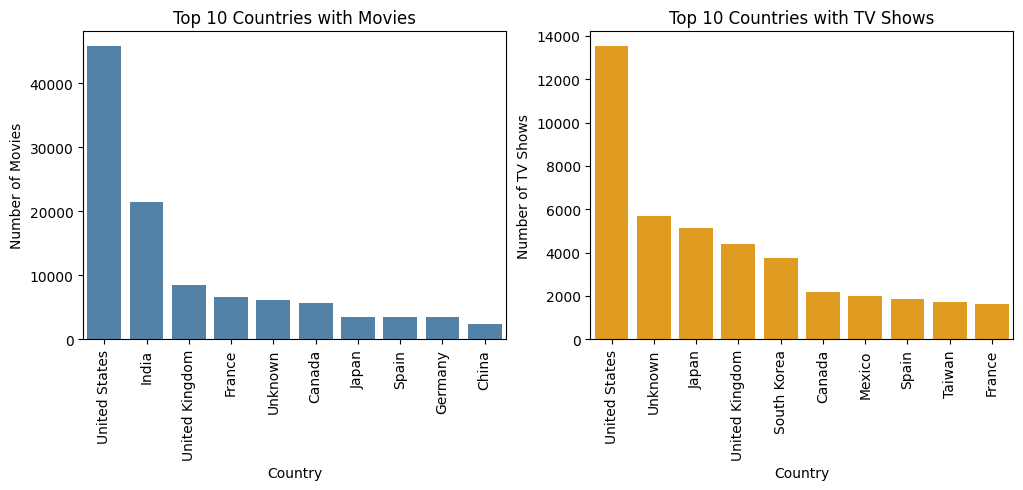

In [342]:
top_10_countries_movies = df_movies.groupby('country')['show_id'].count().nlargest(10)
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_countries_movies.index, y=top_10_countries_movies.values,color='steelblue')
plt.title('Top 10 Countries with Movies')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')

# top 10 countries with TV shows
top_10_countries_TV = df_TV.groupby('country')['show_id'].count().nlargest(10)
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_countries_TV.index, y=top_10_countries_TV.values,color='orange')
plt.title('Top 10 Countries with TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()

#**United States**
###Movie and TV Shows Analysis

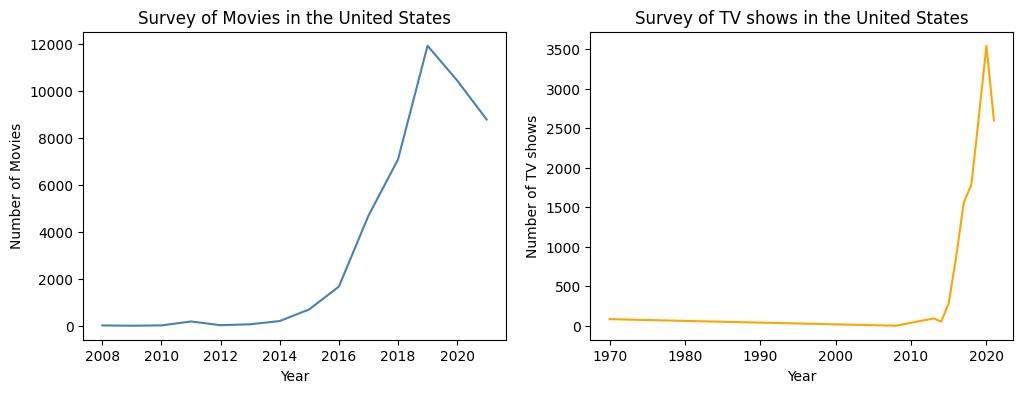

In [343]:
US_movie_list = df_movies[df_movies['country'] == 'United States']
survey_US_movies = US_movie_list.groupby('year')['show_id'].count().reset_index()
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.lineplot(data=survey_US_movies,x='year',y='show_id',color='steelblue')
plt.title('Survey of Movies in the United States')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

US_TV_list = df_TV[df_TV['country'] == 'United States']
survey_US_TV = US_TV_list.groupby('year')['show_id'].count().reset_index()
plt.subplot(1, 2, 2)
sns.lineplot(data=survey_US_TV,x='year',y='show_id',color='orange')
plt.title('Survey of TV shows in the United States')
plt.xlabel('Year')
plt.ylabel('Number of TV shows')
plt.show()

Active Years for movies and TV Shows - 2010 to 2020 as per the above graph

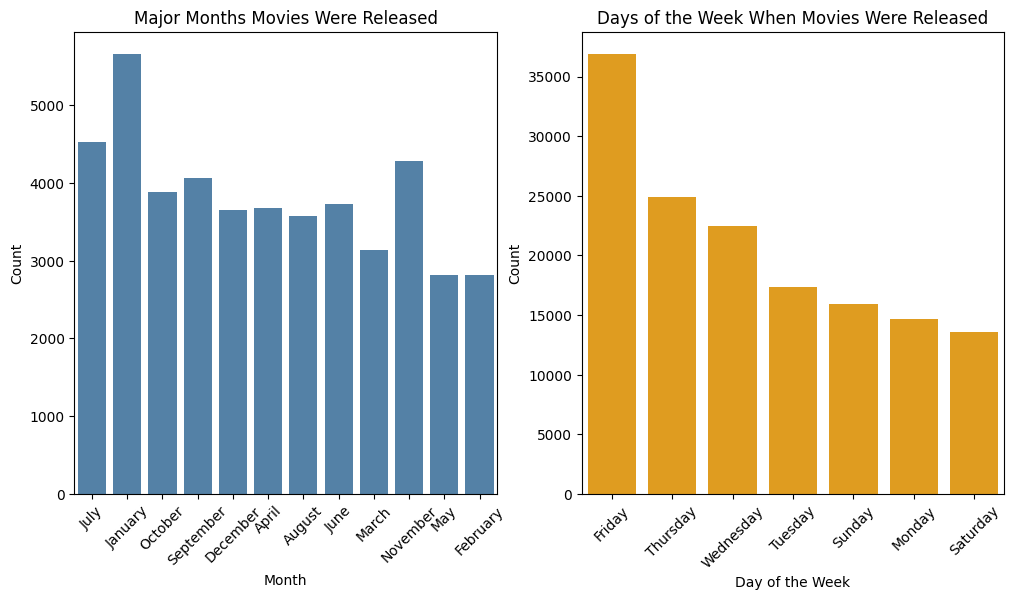

In [344]:
# Major months movies were released
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=df_movies[df_movies['country'] == 'United States'], order=df_movies['month'].value_counts().index,color='steelblue')
plt.title('Major Months Movies Were Released')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Days of the week when movies were released
plt.subplot(1, 2, 2)
sns.countplot(x='day', data=df_movies, order=df_movies['day'].value_counts().index,color='orange')
plt.title('Days of the Week When Movies Were Released')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Max number of movies were released in Jan and specially during Fridays

##Genre doing well during the spike

In [345]:
movies_year_between_2010_2020 = df_movies[(df_movies['release_year'] >= 2010) & (df_movies['release_year'] <= 2020) & (df_movies['country'] == 'United States')]
tv_year_between_2010_2020 = df_TV[(df_TV['release_year'] >= 2010) & (df_TV['release_year'] <= 2020) & (df_TV['country'] == 'United States')]

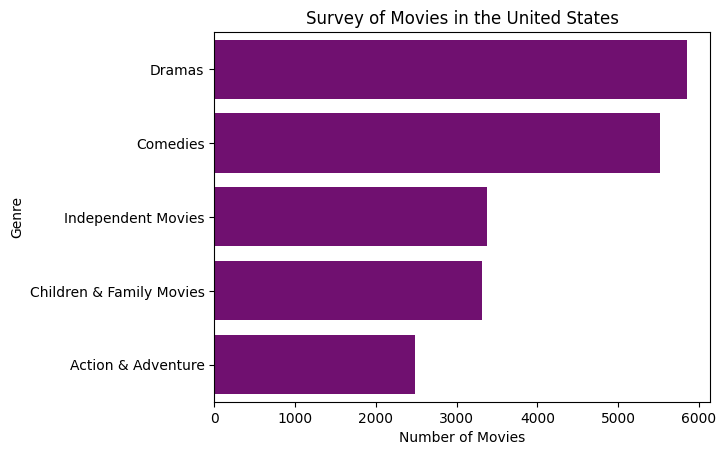

In [346]:
df_movies_genre = movies_year_between_2010_2020.groupby('listed_in')['show_id'].count().reset_index()
df_movies_genre.sort_values(by='show_id', ascending=False, inplace=True)

sns.barplot(data=df_movies_genre.head(),x='show_id',y='listed_in',color='purple')
plt.title('Survey of Movies in the United States')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

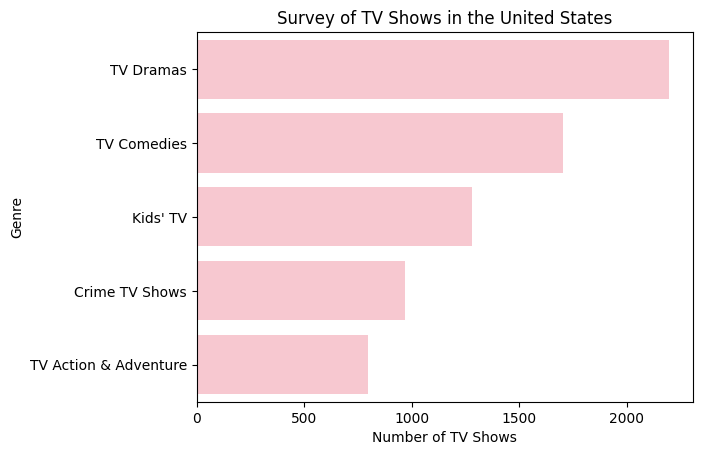

In [347]:
df_TV_genre = tv_year_between_2010_2020.groupby('listed_in')['show_id'].count().reset_index()
df_TV_genre.sort_values(by='show_id', ascending=False, inplace=True)

sns.barplot(data=df_TV_genre.head(),x='show_id',y='listed_in',color='pink')
plt.title('Survey of TV Shows in the United States')
plt.xlabel('Number of TV Shows')
plt.ylabel('Genre')
plt.show()

In [348]:
new_movie_df = df_movies[(df_movies['listed_in'] == 'Dramas') & df_movies['country'].isin(['United States']) & (df_movies['release_year'] >= 2010) & (df_movies['release_year'] <= 2020)]
new_movie_df.sort_values(by='year', ascending=False, inplace=True)
new_movie_df

<ipython-input-348-68db4f682d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movie_df.sort_values(by='year', ascending=False, inplace=True)


,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
940,Birth of the Dragon,George Nolfi,Billy Magnussen,United States,Dramas,39,Movie,2021-09-16,2017,PG-13,96 min,September,Thursday,2021,96
28348,At Eternity's Gate,Julian Schnabel,Anne Consigny,United States,Dramas,1146,Movie,2021-03-31,2018,PG-13,111 min,March,Wednesday,2021,111
27257,An American Girl: McKenna Shoots for the Stars,Vince Marcello,Kally Berard,United States,Dramas,1105,Movie,2021-04-02,2012,TV-Y,94 min,April,Friday,2021,94
27263,An American Girl: McKenna Shoots for the Stars,Vince Marcello,Talia Pura,United States,Dramas,1105,Movie,2021-04-02,2012,TV-Y,94 min,April,Friday,2021,94
27269,An American Girl: McKenna Shoots for the Stars,Vince Marcello,Paula Rivera,United States,Dramas,1105,Movie,2021-04-02,2012,TV-Y,94 min,April,Friday,2021,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133471,Circle,Mario Miscione,Mercy Malick,United States,Dramas,5893,Movie,2015-10-16,2015,TV-MA,86 min,October,Friday,2015,86
133474,Circle,Mario Miscione,Carter Jenkins,United States,Dramas,5893,Movie,2015-10-16,2015,TV-MA,86 min,October,Friday,2015,86
133477,Circle,Mario Miscione,Molly Jackson,United States,Dramas,5893,Movie,2015-10-16,2015,TV-MA,86 min,October,Friday,2015,86
133480,Circle,Mario Miscione,Michael Nardelli,United States,Dramas,5893,Movie,2015-10-16,2015,TV-MA,86 min,October,Friday,2015,86


In [349]:
count_movie_df_duration = new_movie_df.groupby('day')['duration'].max().reset_index()
count_movie_df_duration.sort_values(by='duration', ascending=False, inplace=True)
print(count_movie_df_duration)

         day duration
0     Friday   99 min
1     Monday   99 min
4   Thursday   99 min
6  Wednesday   99 min
5    Tuesday   98 min
3     Sunday   97 min
2   Saturday   96 min


In [350]:
# Calculate the count of drama movies released on each day of the week
count_movie_df = new_movie_df.groupby('day')['duration'].count().reset_index()
count_movie_df.sort_values(by='duration', ascending=False, inplace=True)
print(count_movie_df)

         day  duration
0     Friday      1599
4   Thursday       884
6  Wednesday       738
3     Sunday       727
1     Monday       685
5    Tuesday       654
2   Saturday       559


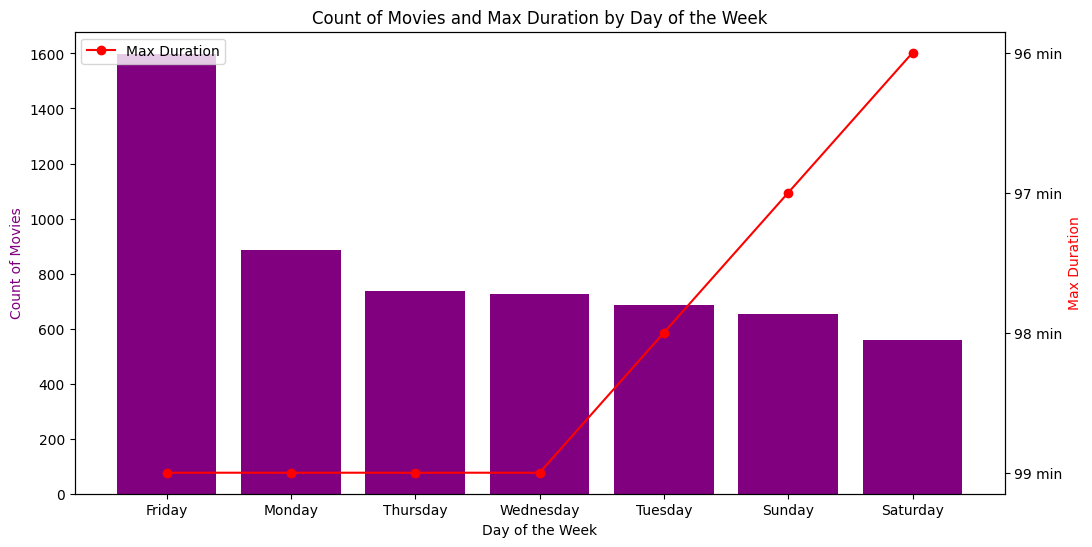

In [351]:
# Plot count_movie_df_duration, day and count_movie_df in a single graph

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(count_movie_df['day'], count_movie_df['duration'], color='purple', label='Count of Movies')
ax2 = ax1.twinx()
ax2.plot(count_movie_df_duration['day'], count_movie_df_duration['duration'], color='red', marker='o', label='Max Duration')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Count of Movies', color='purple')
ax2.set_ylabel('Max Duration', color='red')

plt.title('Count of Movies and Max Duration by Day of the Week')
plt.legend()
plt.show()


During Fridays, we see an movies having more than 1.5 hours getting released and the very following day, there duration for the movies getting released is less

In [352]:
#TV_SHOWS
new_TV_df = df_TV[(df_TV['listed_in'] == 'International TV Shows') & df_TV['country'].isin(['United States']) & (df_TV['release_year'] >= 2010) & (df_TV['release_year'] <= 2020)]
new_TV_df.sort_values(by='year', ascending=False, inplace=True)
new_TV_df

<ipython-input-352-3539de1880e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_TV_df.sort_values(by='year', ascending=False, inplace=True)


,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy
9683,Wynonna Earp,Unknown,Melanie Scrofano,United States,International TV Shows,392,TV Show,2021-07-26,2020,TV-MA,4 Seasons,July,Monday,2021,0
31225,Sin senos sí hay paraíso,Unknown,Juan Pablo Urrego,United States,International TV Shows,1271,TV Show,2021-02-25,2018,TV-MA,3 Seasons,February,Thursday,2021,0
31237,Sin senos sí hay paraíso,Unknown,Johanna Fadul,United States,International TV Shows,1271,TV Show,2021-02-25,2018,TV-MA,3 Seasons,February,Thursday,2021,0
31243,Sin senos sí hay paraíso,Unknown,César Mora,United States,International TV Shows,1271,TV Show,2021-02-25,2018,TV-MA,3 Seasons,February,Thursday,2021,0
31249,Sin senos sí hay paraíso,Unknown,Juan Pablo Llano,United States,International TV Shows,1271,TV Show,2021-02-25,2018,TV-MA,3 Seasons,February,Thursday,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165657,La Familia P. Luche,Unknown,Miguel Perez,United States,International TV Shows,7255,TV Show,1970-01-01,2012,TV-14,3 Seasons,January,Thursday,1970,0
165654,La Familia P. Luche,Unknown,Regina Blandón,United States,International TV Shows,7255,TV Show,1970-01-01,2012,TV-14,3 Seasons,January,Thursday,1970,0
165648,La Familia P. Luche,Unknown,Consuelo Duval,United States,International TV Shows,7255,TV Show,1970-01-01,2012,TV-14,3 Seasons,January,Thursday,1970,0
165645,La Familia P. Luche,Unknown,Eugenio Derbez,United States,International TV Shows,7255,TV Show,1970-01-01,2012,TV-14,3 Seasons,January,Thursday,1970,0


In [353]:
count_TV_df_duration = new_TV_df.groupby('day')['duration'].max().reset_index()
count_TV_df_duration.sort_values(by='duration', ascending=False, inplace=True)
print(count_TV_df_duration)

         day   duration
4   Thursday  8 Seasons
3     Sunday  5 Seasons
0     Friday  4 Seasons
1     Monday  4 Seasons
5    Tuesday  4 Seasons
2   Saturday  3 Seasons
6  Wednesday   1 Season


In [354]:
# Calculate the count of drama movies released on each day of the week
count_TV_df = new_TV_df.groupby('day')['duration'].count().reset_index()
count_TV_df.sort_values(by='duration', ascending=False, inplace=True)
print(count_TV_df)

         day  duration
0     Friday       234
4   Thursday       129
2   Saturday        65
3     Sunday        60
1     Monday        54
6  Wednesday        39
5    Tuesday        26


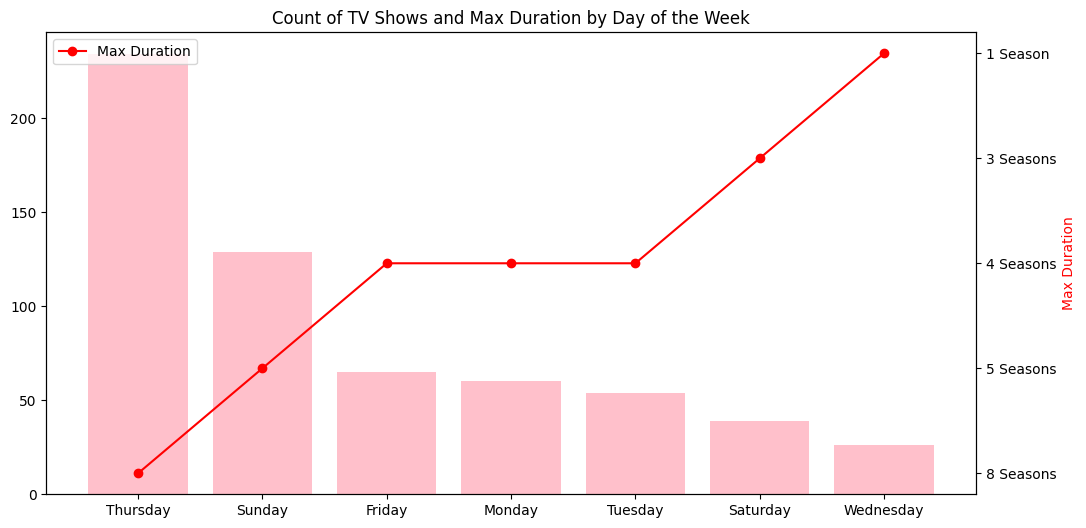

In [355]:
fig1, ax2 = plt.subplots(figsize=(12,6))

ax2.bar(count_TV_df['day'], count_TV_df['duration'], color='pink', label='Count of TV Shows')
ax2 = ax2.twinx()
ax2.plot(count_TV_df_duration['day'], count_TV_df_duration['duration'], color='red', marker='o', label='Max Duration')

ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Count of TV Shows', color='pink')
ax2.set_ylabel('Max Duration', color='red')

plt.title('Count of TV Shows and Max Duration by Day of the Week')
plt.legend()
plt.show()

TV shows filmed for only few seasons is released during the weekdays, but Thursdays sees the highest number of seasons released

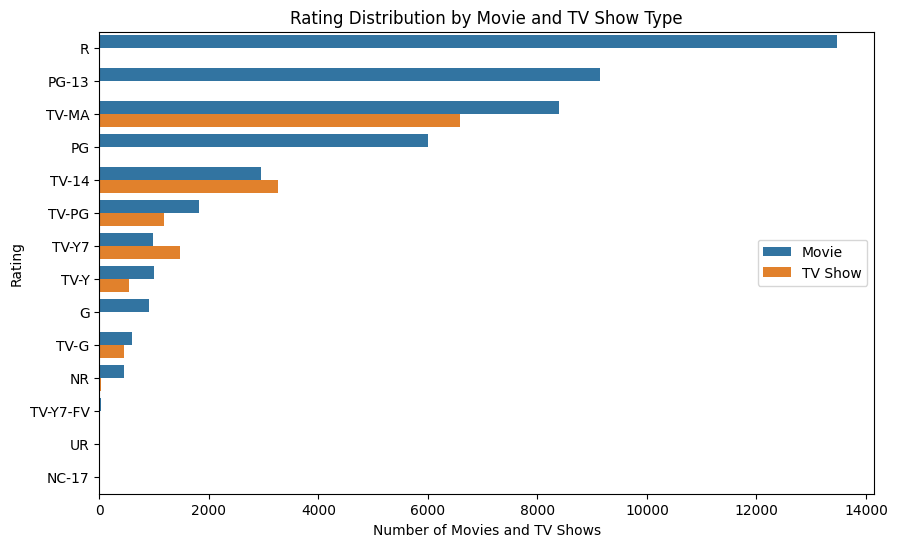

In [356]:
df_rating = df_final[df_final['country'] == 'United States'].groupby(['rating','type'])['show_id'].count().reset_index()
df_rating.sort_values(by='show_id', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=df_rating,x='show_id',y='rating',hue='type')
plt.title('Rating Distribution by Movie and TV Show Type')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Rating')
plt.legend(loc='center right')
plt.show()

Most of the contents are supported for mature audience

In [357]:
df_actors_movie_usa = df_movies[df_final['country'] == 'United States']
df_actors_movie_usa['actors'].unique()

<ipython-input-357-320509271cc4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actors_movie_usa = df_movies[df_final['country'] == 'United States']


array(['Unknown', 'Kofi Ghanaba', 'Oyafunmike Ogunlano', ..., 'Ty Panitz',
       'Derek Graf', 'Ryan Newman'], dtype=object)

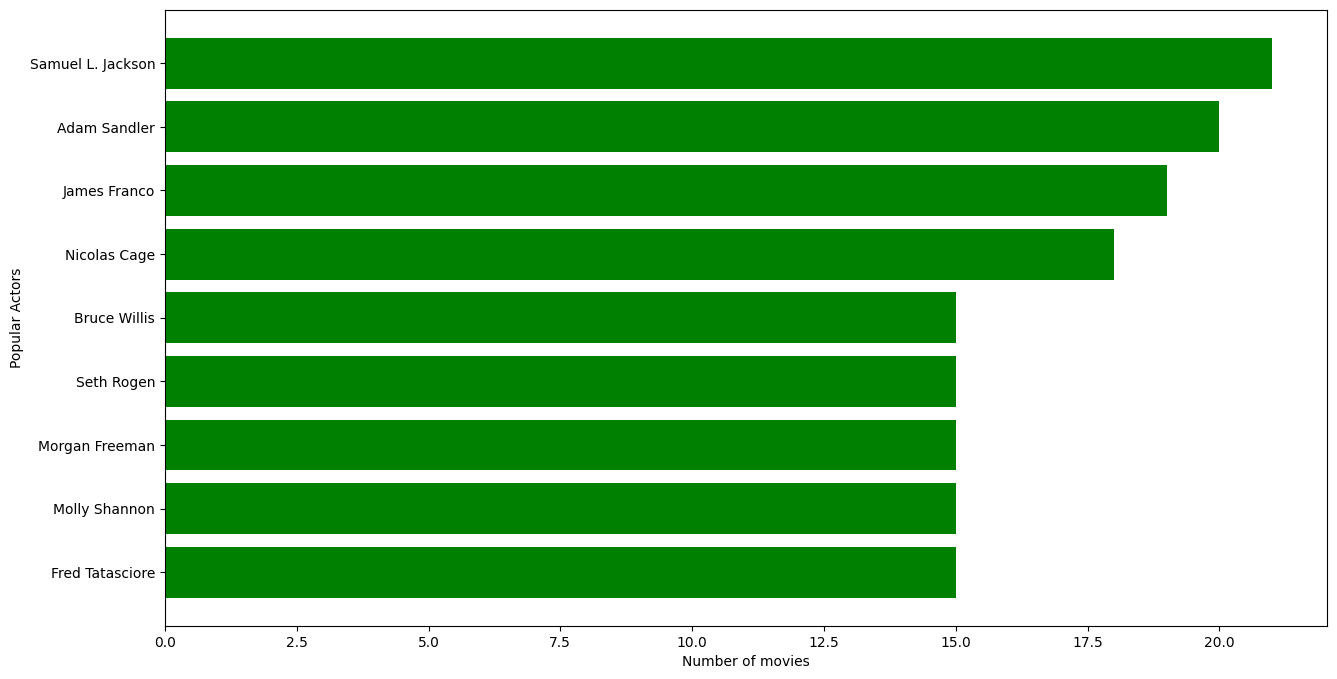

In [358]:
df_actors=df_actors_movie_usa.groupby(['actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['actors']!='Unknown']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['actors'], df_actors[::-1]['title'],color=['green'])
plt.xlabel('Number of movies')
plt.ylabel('Popular Actors')
plt.show()

In [359]:
df_actors_TV_usa = df_TV[df_final['country'] == 'United States']
df_actors_TV_usa['actors'].unique()

<ipython-input-359-7e9200155bd5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actors_TV_usa = df_TV[df_final['country'] == 'United States']


array(['Logan Browning', 'Brandon P. Bell', 'DeRon Horton', ...,
       'Jessica Gee-George', 'Christopher Smith', 'Kyle Hebert'],
      dtype=object)

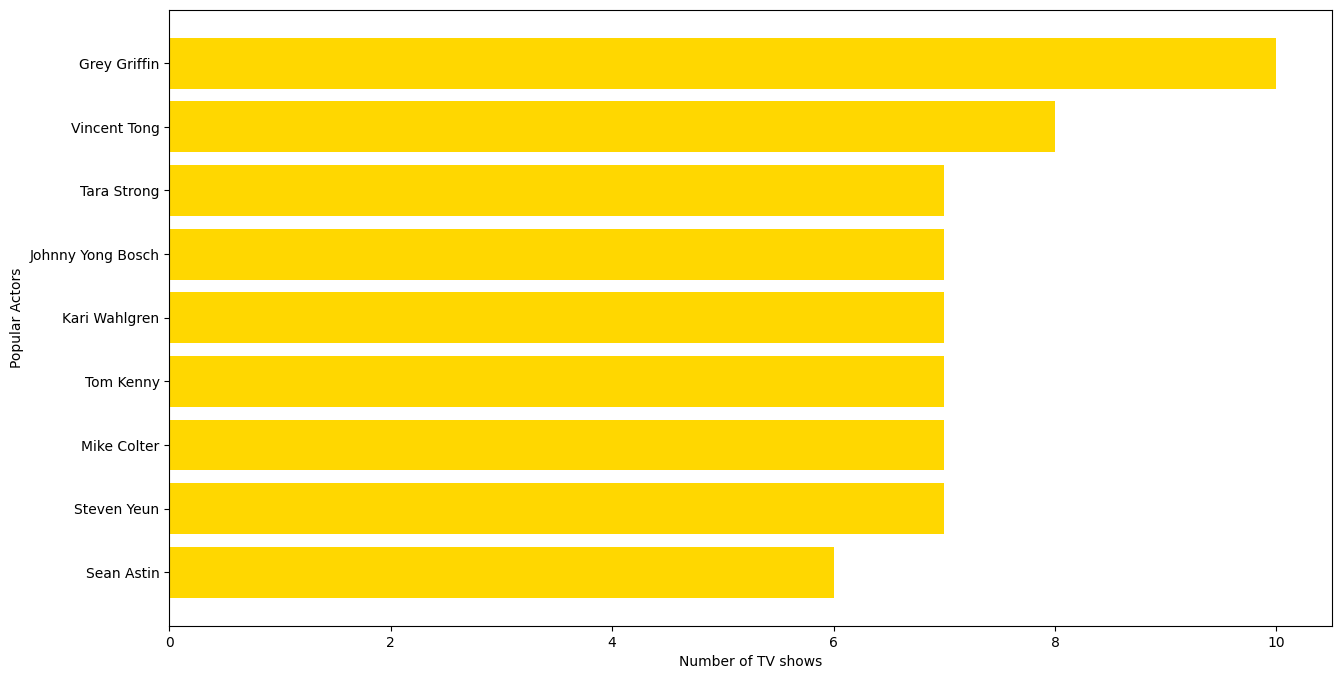

In [360]:
df_actors=df_actors_TV_usa.groupby(['actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['actors']!='Unknown']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['actors'], df_actors[::-1]['title'],color=['gold'])
plt.xlabel('Number of TV shows')
plt.ylabel('Popular Actors')
plt.show()

<ipython-input-361-f2307c98e28e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['Actor_Director'] = df_movies.actors.str.cat(df_movies.director, sep=' and ')


                                Actor_Director  title
40216          Stacy Martin and Lars von Trier     33
40290     Stellan Skarsgård and Lars von Trier     33
43422           Uma Thurman and Lars von Trier     33
7712   Charlotte Gainsbourg and Lars von Trier     33
40084  Sophie Kennedy Clark and Lars von Trier     33
8306       Christian Slater and Lars von Trier     33
39247          Shia LaBeouf and Lars von Trier     33
11521                Donnie Yen and Wilson Yip     26
11907            Eddie Redmayne and Tom Hooper     24
36190              Robin Wright and Ari Folman     21


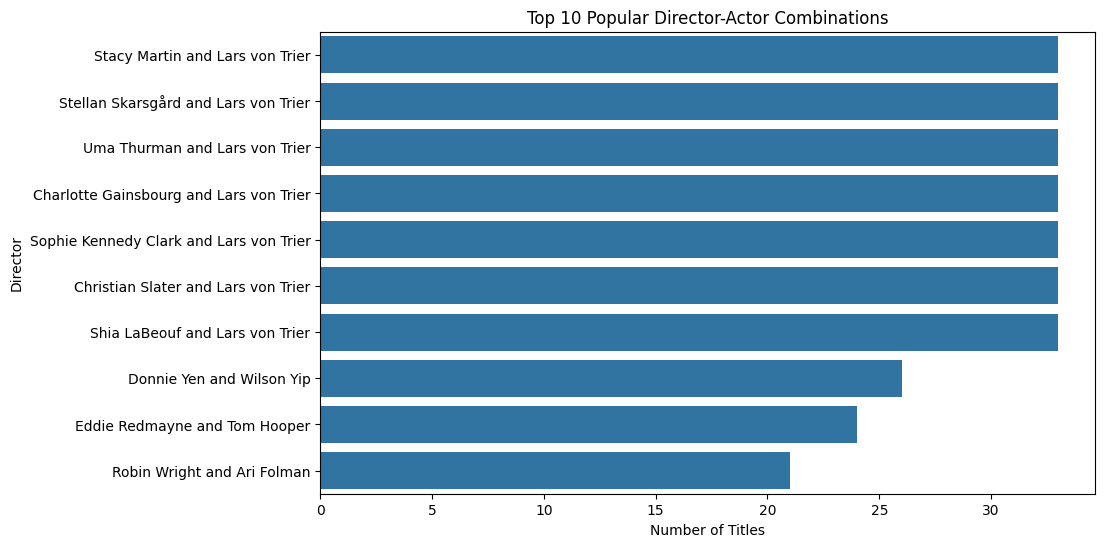

In [361]:
#Popular director actor combination in movies
df_movies['Actor_Director'] = df_movies.actors.str.cat(df_movies.director, sep=' and ')
df_usa_movies_subset=df_movies[df_movies['actors']!='Unknown']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['director']!='Unknown']

df_director_actor_combo = df_usa_movies_subset.groupby(['Actor_Director'])['title'].count().reset_index()
#df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_director']!='Unknown']
df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_Director']!='Unknown']

df_director_actor_combo.sort_values(by='title', ascending=False, inplace=True)

print(df_director_actor_combo.head(10))

# CBar plot to visualize the top 10 combinations
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='Actor_Director', data=df_director_actor_combo.head(10))
plt.title('Top 10 Popular Director-Actor Combinations')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


<ipython-input-362-2c3f2fd30bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TV['Actor_Director'] = df_TV.actors.str.cat(df_TV.director, sep=' and ')


                                  Actor_Director  title
496   David Attenborough and Alastair Fothergill     24
1975                 Shay Mitchell and Jay Oliva      9
2131                Taron Egerton and Noam Murro      9
1530               Nicholas Hoult and Noam Murro      9
995       Juan Pablo Gamboa and Alejandro Lozano      9
2054                    Steve Blum and Jay Oliva      9
1184                  Lee Ingleby and Noam Murro      9
1583                Olivia Colman and Noam Murro      9
494                   Darren Criss and Jay Oliva      9
1010           Julián Román and Alejandro Lozano      9


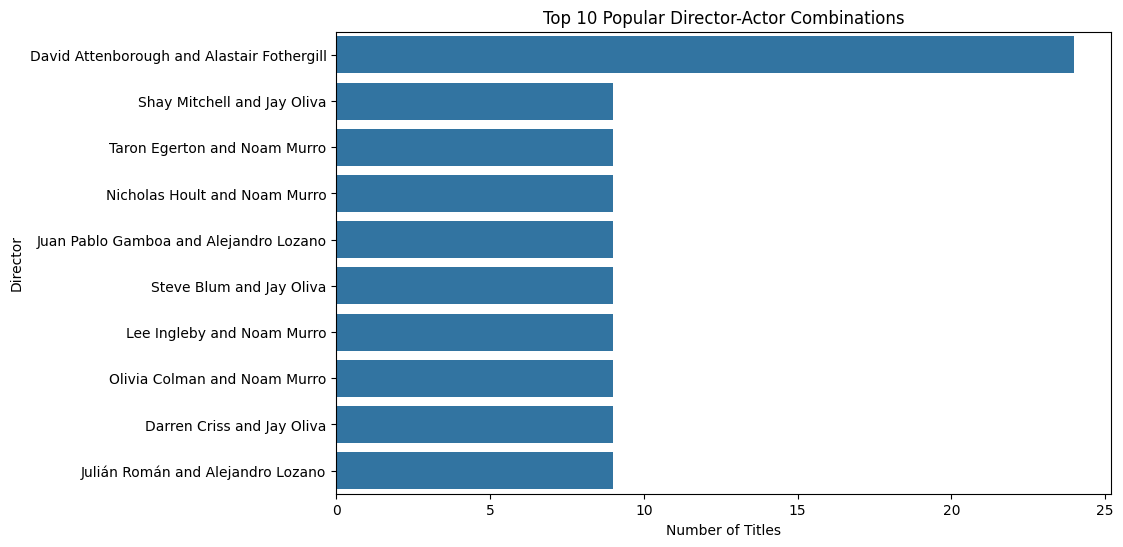

In [362]:
#Popular director actor combination in TV shows
df_TV['Actor_Director'] = df_TV.actors.str.cat(df_TV.director, sep=' and ')
df_usa_TV_subset=df_TV[df_TV['actors']!='Unknown']
df_usa_TV_subset=df_usa_TV_subset[df_usa_TV_subset['director']!='Unknown']

df_director_actor_combo = df_usa_TV_subset.groupby(['Actor_Director'])['title'].count().reset_index()
#df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_director']!='Unknown']
df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_Director']!='Unknown']

df_director_actor_combo.sort_values(by='title', ascending=False, inplace=True)

print(df_director_actor_combo.head(10))

# CBar plot to visualize the top 10 combinations
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='Actor_Director', data=df_director_actor_combo.head(10))
plt.title('Top 10 Popular Director-Actor Combinations')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#**India**
##Movie and TV Show Analysis

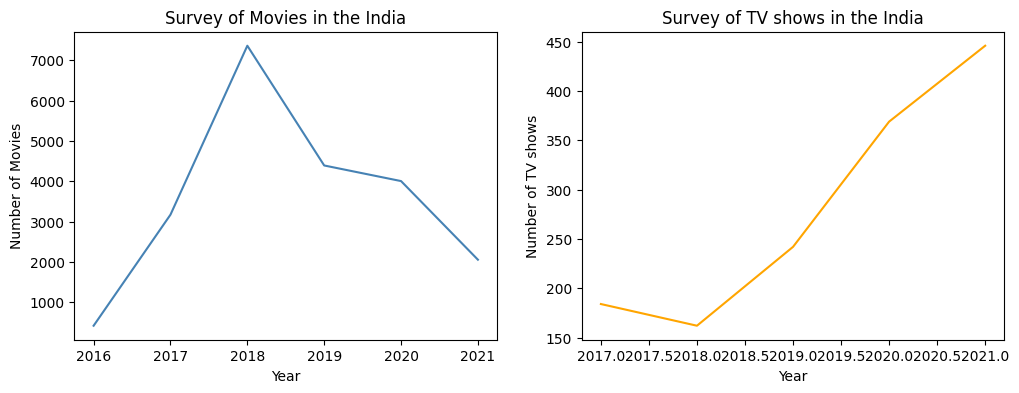

In [363]:
India_movie_list = df_movies[df_movies['country'] == 'India']
survey_India_movies = India_movie_list.groupby('year')['show_id'].count().reset_index()
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.lineplot(data=survey_India_movies,x='year',y='show_id',color='steelblue')
plt.title('Survey of Movies in the India')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

India_TV_list = df_TV[df_TV['country'] == 'India']
survey_India_TV = India_TV_list.groupby('year')['show_id'].count().reset_index()
plt.subplot(1, 2, 2)
sns.lineplot(data=survey_India_TV,x='year',y='show_id',color='orange')
plt.title('Survey of TV shows in the India')
plt.xlabel('Year')
plt.ylabel('Number of TV shows')
plt.show()

Most of the movies and TV Shows were released between 2016 - 2021

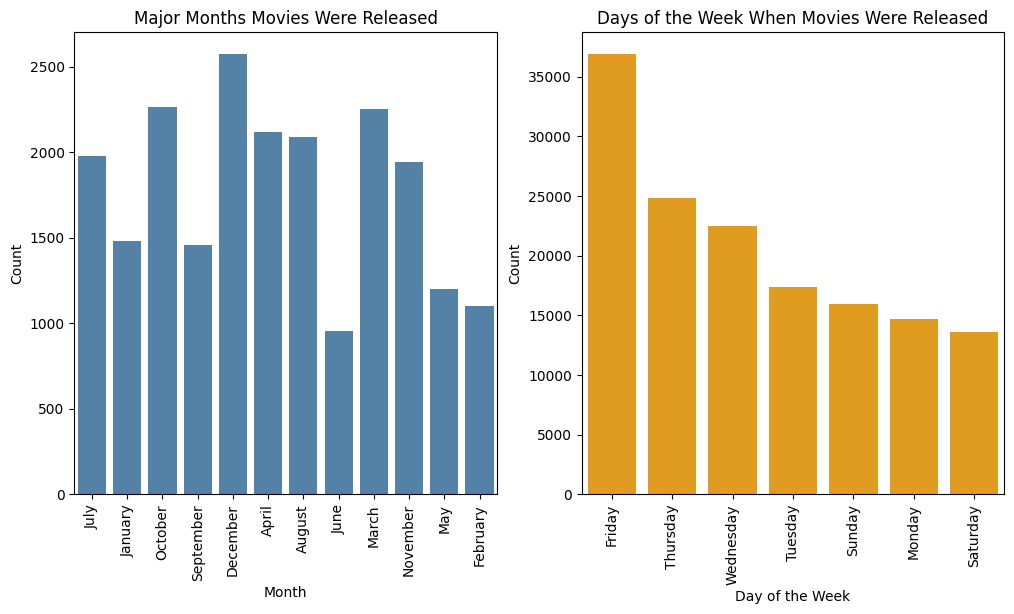

In [364]:
# Major months movies were released
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=df_movies[df_movies['country'] == 'India'], order=df_movies['month'].value_counts().index,color='steelblue')
plt.title('Major Months Movies Were Released')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Days of the week when movies were released
plt.subplot(1, 2, 2)
sns.countplot(x='day', data=df_movies, order=df_movies['day'].value_counts().index,color='orange')
plt.title('Days of the Week When Movies Were Released')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

December sees major releases and during Fridays

#Genre doing well during the spike

In [393]:
movies_year_between_2010_2020_Ind = df_movies[(df_movies['release_year'] >= 2016) & (df_movies['release_year'] <= 2020) & (df_movies['country'] == 'India')]
tv_year_between_2010_2020_Ind = df_TV[(df_TV['release_year'] >= 2010) & (df_TV['release_year'] <= 2020) & (df_TV['country'] == 'India')]

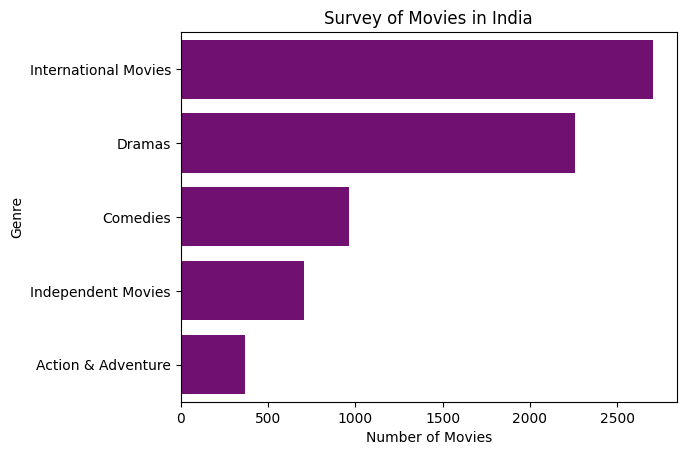

In [398]:
df_movies_genre = movies_year_between_2010_2020_Ind.groupby('listed_in')['show_id'].count().reset_index()
df_movies_genre.sort_values(by='show_id', ascending=False, inplace=True)
sns.barplot(data=df_movies_genre.head(),x='show_id',y='listed_in',color='purple')
plt.title('Survey of Movies in India')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

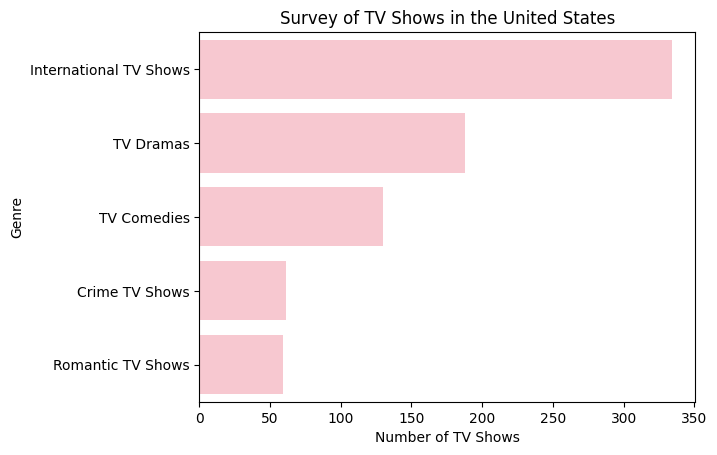

In [395]:
df_TV_genre = tv_year_between_2010_2020_Ind.groupby('listed_in')['show_id'].count().reset_index()
df_TV_genre.sort_values(by='show_id', ascending=False, inplace=True)

sns.barplot(data=df_TV_genre.head(),x='show_id',y='listed_in',color='pink')
plt.title('Survey of TV Shows in the United States')
plt.xlabel('Number of TV Shows')
plt.ylabel('Genre')
plt.show()

In [399]:
new_movie_df_Ind = df_movies[(df_movies['listed_in'] == 'International Movies') & df_movies['country'].isin(['India']) & (df_movies['release_year'] >= 2016) & (df_movies['release_year'] <= 2020)]
new_movie_df_Ind.sort_values(by='year', ascending=False, inplace=True)
new_movie_df_Ind

<ipython-input-399-c1db3436007d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movie_df_Ind.sort_values(by='year', ascending=False, inplace=True)


,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy,Actor_Director
2602,Gurgaon,Shanker Raman,Akshay Oberoi,India,International Movies,119,Movie,2021-09-02,2017,TV-14,106 min,September,Thursday,2021,106,Akshay Oberoi and Shanker Raman
27719,Madam Chief Minister,Subhash Kapoor,Richa Chadda,India,International Movies,1123,Movie,2021-04-01,2020,TV-14,121 min,April,Thursday,2021,121,Richa Chadda and Subhash Kapoor
28264,Wazir,Bejoy Nambiar,John Abraham,India,International Movies,1142,Movie,2021-04-01,2016,TV-14,98 min,April,Thursday,2021,98,John Abraham and Bejoy Nambiar
28261,Wazir,Bejoy Nambiar,Neil Nitin Mukesh,India,International Movies,1142,Movie,2021-04-01,2016,TV-14,98 min,April,Thursday,2021,98,Neil Nitin Mukesh and Bejoy Nambiar
28258,Wazir,Bejoy Nambiar,Manav Kaul,India,International Movies,1142,Movie,2021-04-01,2016,TV-14,98 min,April,Thursday,2021,98,Manav Kaul and Bejoy Nambiar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129963,The Violin Player,Bauddhayan Mukherji,Sonam Stobgais,India,International Movies,5706,Movie,2016-12-01,2016,TV-14,72 min,December,Thursday,2016,72,Sonam Stobgais and Bauddhayan Mukherji
131860,Brahman Naman,Qaushiq Mukherjee,Shashank Arora,India,International Movies,5834,Movie,2016-07-06,2016,TV-MA,96 min,July,Wednesday,2016,96,Shashank Arora and Qaushiq Mukherjee
131890,Brahman Naman,Qaushiq Mukherjee,Sid Mallya,India,International Movies,5834,Movie,2016-07-06,2016,TV-MA,96 min,July,Wednesday,2016,96,Sid Mallya and Qaushiq Mukherjee
131872,Brahman Naman,Qaushiq Mukherjee,Chaitanya Varad,India,International Movies,5834,Movie,2016-07-06,2016,TV-MA,96 min,July,Wednesday,2016,96,Chaitanya Varad and Qaushiq Mukherjee


In [400]:
count_movie_df_duration_Ind = new_movie_df_Ind.groupby('day')['duration'].max().reset_index()
count_movie_df_duration_Ind.sort_values(by='duration', ascending=False, inplace=True)
print(count_movie_df_duration_Ind)

         day duration
0     Friday   99 min
5    Tuesday   99 min
4   Thursday   98 min
6  Wednesday   98 min
3     Sunday   97 min
2   Saturday   93 min
1     Monday   90 min


In [401]:
new_TV_df_Ind = df_TV[(df_TV['listed_in'] == 'International TV Shows') & df_TV['country'].isin(['India']) & (df_TV['release_year'] >= 2010) & (df_TV['release_year'] <= 2020)]
new_TV_df_Ind.sort_values(by='year', ascending=False, inplace=True)
new_TV_df_Ind

<ipython-input-401-3da38857aa6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_TV_df_Ind.sort_values(by='year', ascending=False, inplace=True)


,title,director,actors,country,listed_in,show_id,type,date_added,release_year,rating,duration,month,day,year,duration_copy,Actor_Director
1243,Dharmakshetra,Unknown,Kashmira Irani,India,International TV Shows,51,TV Show,2021-09-15,2014,TV-PG,1 Season,September,Wednesday,2021,1,Kashmira Irani and Unknown
1264,Dharmakshetra,Unknown,Amit Behl,India,International TV Shows,51,TV Show,2021-09-15,2014,TV-PG,1 Season,September,Wednesday,2021,1,Amit Behl and Unknown
31495,Zindagi in Short,Unknown,Unknown,India,International TV Shows,1283,TV Show,2021-02-22,2020,TV-MA,1 Season,February,Monday,2021,1,Unknown and Unknown
6217,The Creative Indians,Unknown,Unknown,India,International TV Shows,267,TV Show,2021-08-15,2020,TV-MA,1 Season,August,Sunday,2021,1,Unknown and Unknown
1715,Stories by Rabindranath Tagore,Unknown,Unknown,India,International TV Shows,70,TV Show,2021-09-15,2015,TV-PG,1 Season,September,Wednesday,2021,1,Unknown and Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168259,Maharakshak Devi,Unknown,Umang Jain,India,International TV Shows,7382,TV Show,2017-04-15,2015,TV-14,1 Season,April,Saturday,2017,1,Umang Jain and Unknown
140543,Badalte Rishton Ki Dastaan,Unknown,Sanjeeda Sheikh,India,International TV Shows,6217,TV Show,2017-04-01,2013,TV-14,1 Season,April,Saturday,2017,1,Sanjeeda Sheikh and Unknown
140545,Badalte Rishton Ki Dastaan,Unknown,Kiran Karmarkar,India,International TV Shows,6217,TV Show,2017-04-01,2013,TV-14,1 Season,April,Saturday,2017,1,Kiran Karmarkar and Unknown
140547,Badalte Rishton Ki Dastaan,Unknown,Abhinav Shukla,India,International TV Shows,6217,TV Show,2017-04-01,2013,TV-14,1 Season,April,Saturday,2017,1,Abhinav Shukla and Unknown


In [402]:
count_movie_df_Ind = new_movie_df_Ind.groupby('day')['duration'].count().reset_index()
count_movie_df_Ind.sort_values(by='duration', ascending=False, inplace=True)
print(count_movie_df_Ind)

         day  duration
0     Friday       583
3     Sunday       403
5    Tuesday       381
4   Thursday       377
6  Wednesday       371
1     Monday       337
2   Saturday       253


In [403]:
count_TV_df_Ind = new_TV_df_Ind.groupby('day')['duration'].count().reset_index()
count_TV_df_Ind.sort_values(by='duration', ascending=False, inplace=True)
print(count_TV_df)

         day  duration
0     Friday       234
4   Thursday       129
2   Saturday        65
3     Sunday        60
1     Monday        54
6  Wednesday        39
5    Tuesday        26


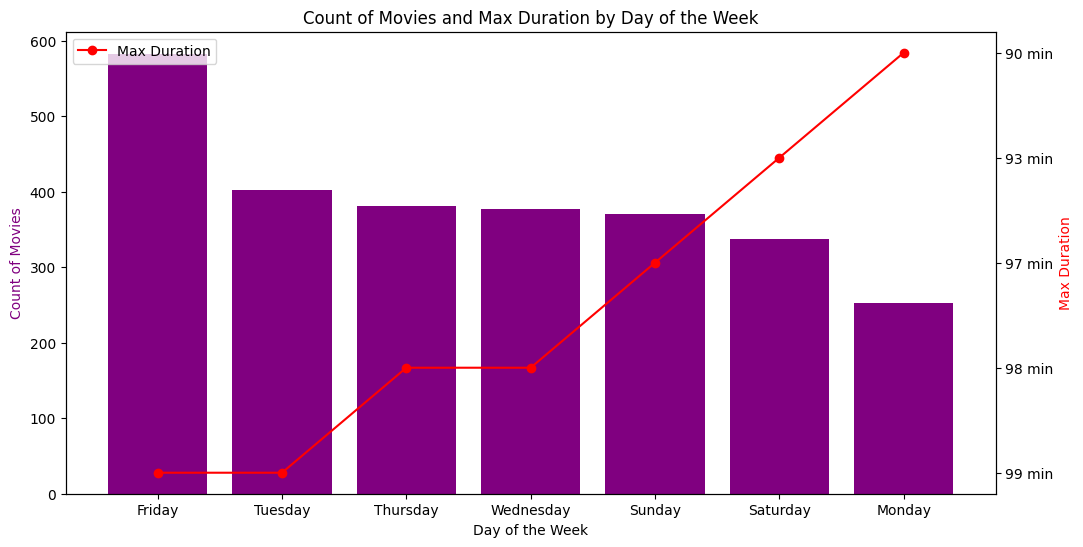

In [404]:
# Plot count_movie_df_duration, day and count_movie_df in a single graph

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(count_movie_df_Ind['day'], count_movie_df_Ind['duration'], color='purple', label='Count of Movies')
ax2 = ax1.twinx()
ax2.plot(count_movie_df_duration_Ind['day'], count_movie_df_duration_Ind['duration'], color='red', marker='o', label='Max Duration')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Count of Movies', color='purple')
ax2.set_ylabel('Max Duration', color='red')

plt.title('Count of Movies and Max Duration by Day of the Week')
plt.legend()
plt.show()

In [405]:
count_TV_df_duration_Ind = new_TV_df_Ind.groupby('day')['duration'].max().reset_index()
count_TV_df_duration_Ind.sort_values(by='duration', ascending=False, inplace=True)
print(count_TV_df_duration_Ind)

         day   duration
0     Friday  3 Seasons
2   Saturday  3 Seasons
4   Thursday  3 Seasons
1     Monday   1 Season
3     Sunday   1 Season
5    Tuesday   1 Season
6  Wednesday   1 Season


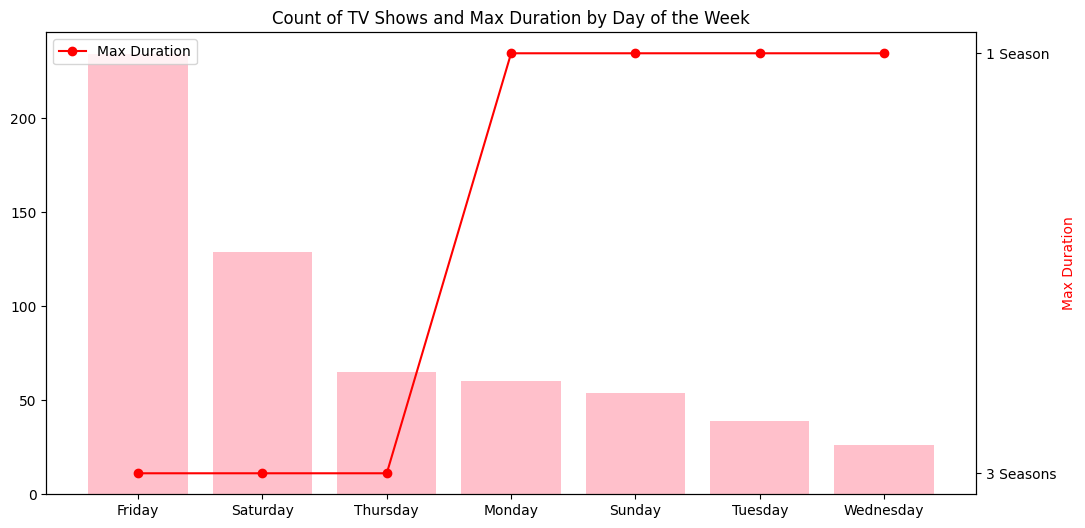

In [406]:
fig1, ax2 = plt.subplots(figsize=(12,6))

ax2.bar(count_TV_df_Ind['day'], count_TV_df['duration'], color='pink', label='Count of TV Shows')
ax2 = ax2.twinx()
ax2.plot(count_TV_df_duration_Ind['day'], count_TV_df_duration_Ind['duration'], color='red', marker='o', label='Max Duration')

ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Count of TV Shows', color='pink')
ax2.set_ylabel('Max Duration', color='red')

plt.title('Count of TV Shows and Max Duration by Day of the Week')
plt.legend()
plt.show()

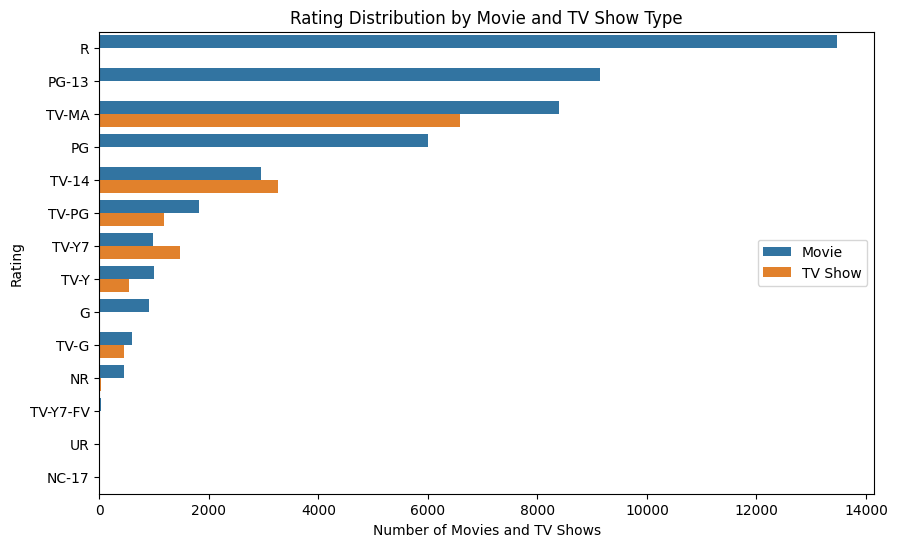

In [407]:
df_rating_Ind = df_final[df_final['country'] == 'India'].groupby(['rating','type'])['show_id'].count().reset_index()
df_rating_Ind.sort_values(by='show_id', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=df_rating,x='show_id',y='rating',hue='type')
plt.title('Rating Distribution by Movie and TV Show Type')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Rating')
plt.legend(loc='center right')
plt.show()

In [408]:
df_actors_movie_ind = df_movies[df_final['country'] == 'India']
df_actors_movie_ind['actors'].unique()

<ipython-input-408-4d754bdae019>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actors_movie_ind = df_movies[df_final['country'] == 'India']


array(['Prashanth', 'Aishwarya Rai Bachchan', 'Sri Lakshmi', ...,
       'Malkeet Rauni', 'Anita Shabdish', 'Chittaranjan Tripathy'],
      dtype=object)

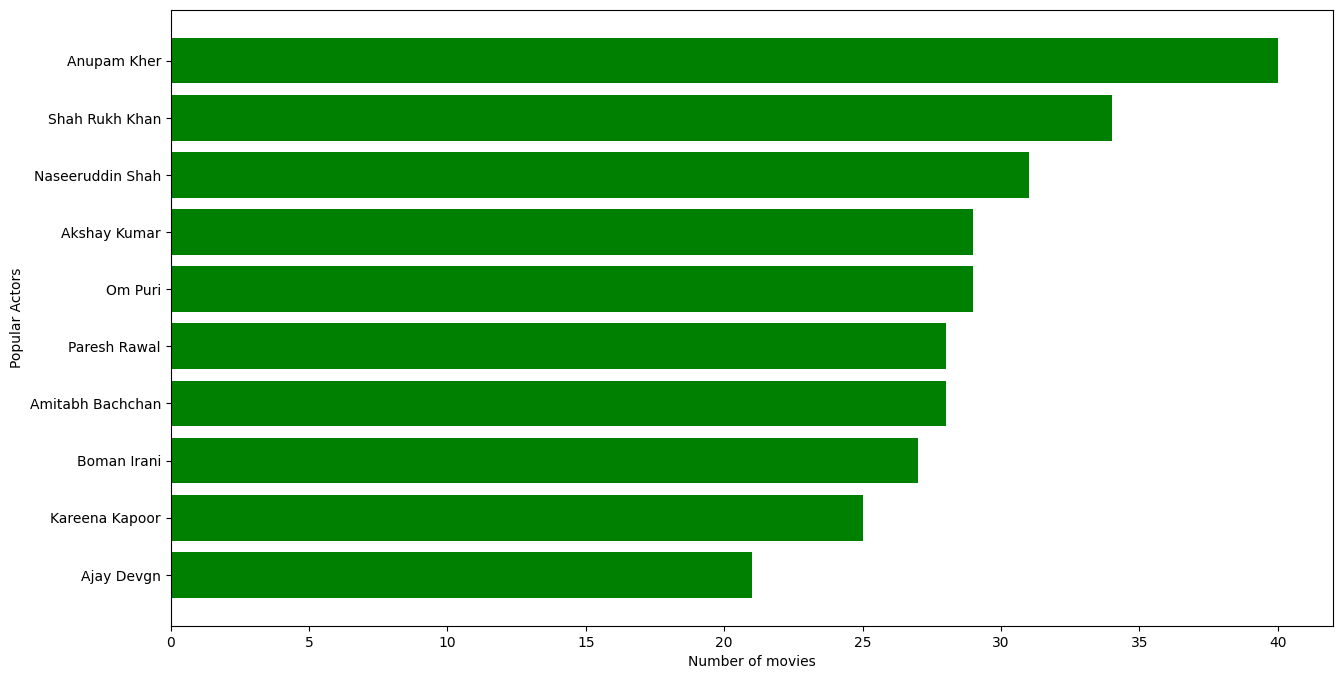

In [409]:
df_actors_ind=df_actors_movie_ind.groupby(['actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors_ind=df_actors_ind[df_actors_ind['actors']!='Unknown']
plt.figure(figsize=(15,8))
plt.barh(df_actors_ind[::-1]['actors'], df_actors_ind[::-1]['title'],color=['green'])
plt.xlabel('Number of movies')
plt.ylabel('Popular Actors')
plt.show()

In [410]:
df_actors_TV_ind = df_TV[df_final['country'] == 'India']
df_actors_TV_ind['actors'].unique()

<ipython-input-410-b1bbaad1a36d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actors_TV_ind = df_TV[df_final['country'] == 'India']


array(['Mayur More', 'Jitendra Kumar', 'Ranjan Raj', 'Alam Khan',
       'Ahsaas Channa', 'Revathi Pillai', 'Urvi Singh', 'Arun Kumar',
       'Vatsal Dubey', 'Julie Tejwani', 'Rupa Bhimani', 'Jigna Bhardwaj',
       'Rajesh Kava', 'Mousam', 'Swapnil', 'Kashmira Irani',
       'Chandan Anand', 'Dinesh Mehta', 'Ankit Arora', 'Pushkar Goggiaa',
       'Anjali Rana', 'Aarya DharmChand Kumar', 'Amit Behl',
       'Maleeka Ghai', 'Unknown', 'Suriya', 'Vijay Sethupathi', 'Revathy',
       'Prakash Raj', 'Siddarth', 'Parvathy', 'Delhi Ganesh',
       'Gautham Vasudev Menon', 'Anjali', 'Yogi Babu', 'Aditi Balan',
       'Remya Nambeesan', 'Poorna', 'Prayaga Martin', 'Rythvika Suriya',
       'Arvind Swamy', 'Prasanna', 'Atharva', 'Bobby Simha',
       'Ashok Selvan', 'Nedumudi Venu', 'Kishore', 'Jaaved Jaaferi',
       'Rutledge Wood', 'Pooja Bhatt', 'Shahana Goswami',
       'Amruta Subhash', 'Plabita Borthakur', 'Aadhya Anand',
       'Manish Chaudhary', 'Vivek Gomber', 'Danish Husain', 'Rah

In [418]:

df_actors=df_actors_TV_ind.groupby(['actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_actors=df_actors[df_actors['actors']!='Unknown']
df_actors

,actors,title
193,Nishka Raheja,3
233,Rajesh Kava,3
46,Aranya Kaur,2
236,Rajesh Tailang,2
297,Shanoor Mirza,2
...,...,...
130,Karan Suchak,1
129,Kanika Shivpuri,1
128,Kaneez Surka,1
127,Kamalika Guha Thakurta,1


                           Actor_Director  title
742          Anupam Kher and David Dhawan     18
5412   Salman Khan and Sooraj R. Barjatya     15
369      Alok Nath and Sooraj R. Barjatya     15
3598  Mohnish Bahl and Sooraj R. Barjatya     12
5402         Salman Khan and David Dhawan     12
4894        Rajpal Yadav and Priyadarshan     11
1968       Gulshan Grover and Umesh Mehra     10
3552   Mithun Chakraborty and Umesh Mehra     10
4982         Rani Mukerji and Karan Johar     10
232            Ajay Devgn and Prakash Jha     10


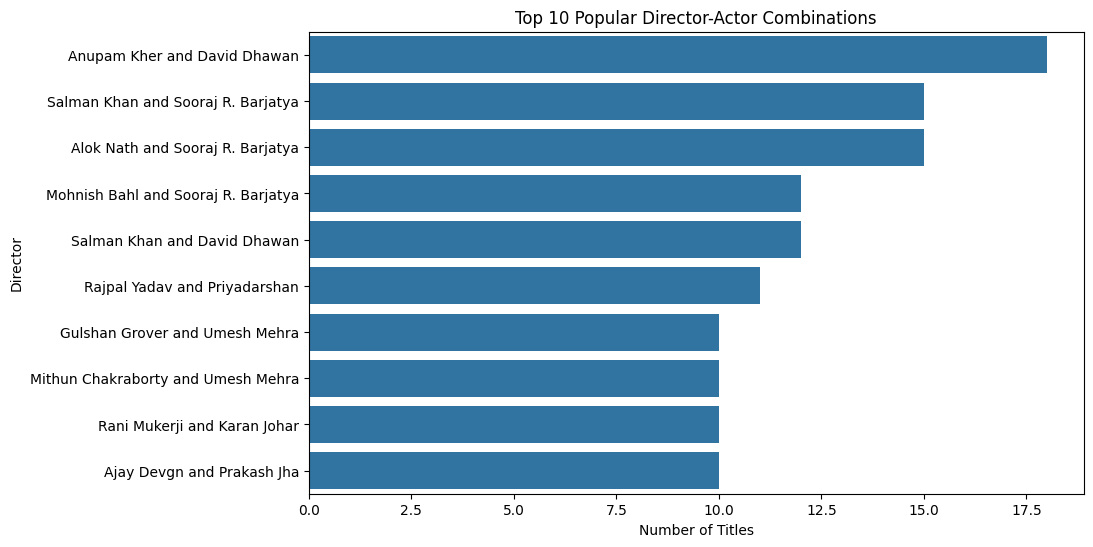

In [390]:
#Popular director actor combination in movies

df_ind_movies_subset=df_movies[(df_movies['actors']!='Unknown') & (df_movies['country'] == 'India')]
df_ind_movies_subset=df_ind_movies_subset[df_ind_movies_subset['director']!='Unknown']

df_director_actor_combo = df_ind_movies_subset.groupby(['Actor_Director'])['title'].count().reset_index()
#df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_director']!='Unknown']
df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_Director']!='Unknown']

df_director_actor_combo.sort_values(by='title', ascending=False, inplace=True)

print(df_director_actor_combo.head(10))

# CBar plot to visualize the top 10 combinations
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='Actor_Director', data=df_director_actor_combo.head(10))
plt.title('Top 10 Popular Director-Actor Combinations')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

                                      Actor_Director  title
102  Gautham Vasudev Menon and Gautham Vasudev Menon      3
15                     Amit Sial and Soumendra Padhi      3
121                Jitendra Joshi and Anurag Kashyap      3
261           Saif Ali Khan and Vikramaditya Motwane      3
260                 Saif Ali Khan and Anurag Kashyap      3
296           Sparsh Shrivastava and Soumendra Padhi      3
140                 Mahesh Balraj and Patrick Graham      3
141                    Manav Kaul and Patrick Graham      3
33             Anshumaan Pushkar and Soumendra Padhi      3
146                Monika Panwar and Soumendra Padhi      3


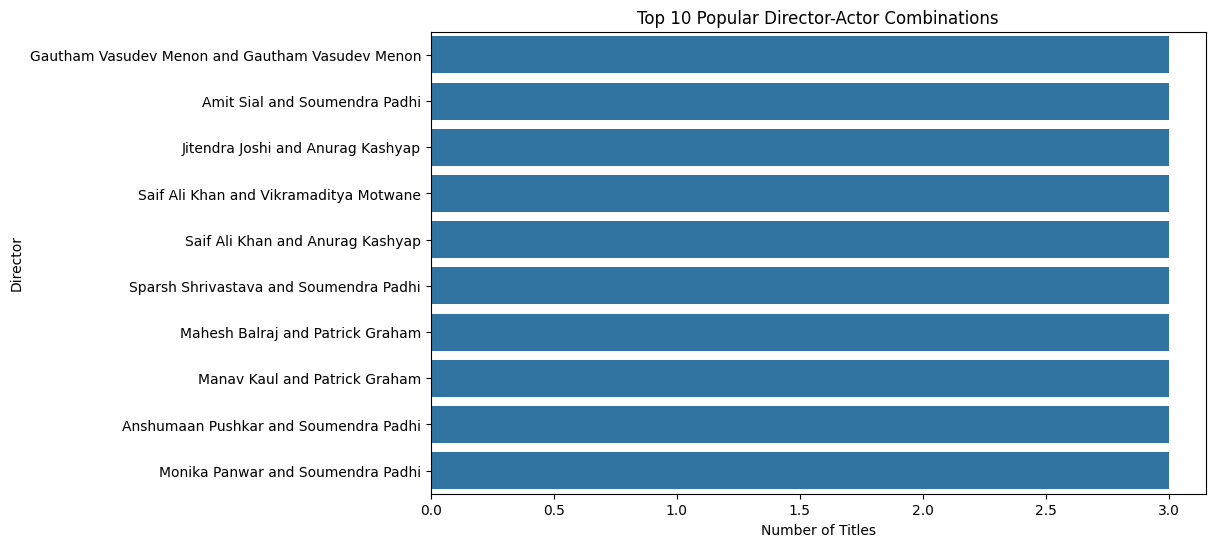

In [392]:
df_ind_TV_subset=df_TV[(df_TV['actors']!='Unknown') & (df_TV['country'] == 'India')]
df_ind_TV_subset=df_ind_TV_subset[df_ind_TV_subset['director']!='Unknown']

df_director_actor_combo = df_ind_TV_subset.groupby(['Actor_Director'])['title'].count().reset_index()
df_director_actor_combo = df_director_actor_combo[df_director_actor_combo['Actor_Director']!='Unknown']

df_director_actor_combo.sort_values(by='title', ascending=False, inplace=True)

print(df_director_actor_combo.head(10))

# CBar plot to visualize the top 10 combinations
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='Actor_Director', data=df_director_actor_combo.head(10))
plt.title('Top 10 Popular Director-Actor Combinations')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#**RECOMMENDATIONS**

* Addition of more content related to the Kids Genre could attract more subscriptions.
* Most of the Indian contents are listed as International Movies and TV, which could be a plausible benifit if more content are added much frequently.
* Distributing the TV shows' releases throughout the week, can be more beneificial to retain the screentime of the audience.
* Movies with duration of 99mins are observed to be more in production, which can be release on the platform atleast a day more.
* September and May months can fetch a good profit if the Movies/TV shows are being released for the Kids in India since it is a festive/holiday season.